### Multiple Regression

In [37]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import sklearn.metrics as metrics
import scipy.stats as stats

In [38]:
import pandas as pd
"""The following code opens our modified dataset for model processing. It then drops the necessary columns. We then convert the variables Year, Month, Wea into objective 
variables so the model can identify them as categorical"""


# Read the data
ocean = pd.read_csv('ocean1.csv', index_col=0)

# Drop specified columns
columns_to_drop = ['Depthm', 'STheta', 'O2Sat', 'Oxy_µmol/Kg','T_degC']
ocean = ocean.drop(columns=columns_to_drop)

# Convert selected columns to object type
ocean[['Year', 'Month', 'Wea']] = ocean[['Year', 'Month', 'Wea']].astype('object')

# Check the updated DataFrame
ocean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 765355 to 830772
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Salnty    2000 non-null   float64
 1   O2ml_L    2000 non-null   float64
 2   Year      2000 non-null   object 
 3   Month     2000 non-null   object 
 4   Bottom_D  2000 non-null   float64
 5   Wea       2000 non-null   object 
dtypes: float64(3), object(3)
memory usage: 109.4+ KB


In [39]:
df = ocean.copy()
dummies = pd.get_dummies(df, drop_first=True)

dummies

/var/folders/20/kt9gy6bn5dbdfmxkq50cn7ch0000gn/T/ipykernel_96455/785365793.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(df, drop_first=True)
/var/folders/20/kt9gy6bn5dbdfmxkq50cn7ch0000gn/T/ipykernel_96455/785365793.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(df, drop_first=True)
/var/folders/20/kt9gy6bn5dbdfmxkq50cn7ch0000gn/T/ipykernel_96455/785365793.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(df, drop_first=True)


,Salnty,O2ml_L,Bottom_D,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,...,Month_7,Month_8,Month_9,Month_10,Month_11,Wea_1.0,Wea_2.0,Wea_3.0,Wea_4.0,Wea_6.0
765355,34.155,0.70,3935.0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
765398,34.148,2.08,635.0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
765400,34.184,1.75,635.0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
765402,34.259,1.20,635.0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
765405,34.301,0.70,635.0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817760,34.108,1.45,1339.0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
817762,34.166,1.12,1339.0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
817765,34.191,0.72,1339.0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
817767,34.255,0.40,1339.0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [47]:
"""The following code splits into predictor variables (x) 
and the target variable (y). Then the data is split into 80% of the data is used for training (x_train and y_train) 
and 20% is used for testing (x_test and y_test). Finally, a multi regression model is fit."""
x = dummies.iloc[:, 1:]
y = dummies.iloc[:, :1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

mlr = LinearRegression()  
mlr.fit(x_train, y_train)



x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 Salnty   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     548.8
Date:                Thu, 30 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:54:22   Log-Likelihood:                 3220.8
No. Observations:                2000   AIC:                            -6392.
Df Residuals:                    1975   BIC:                            -6252.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.3733      0.006   5572.705      0.0

In [41]:
""" The code is evaluating the performance of the linear regression model using various metrics"""
y_pred = mlr.predict(x_test)
x = dummies.iloc[:, 1:]
# print(y_pred)

meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('R squared: {:.2f}'.format(mlr.score(x, y) * 100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 86.91
Mean Absolute Error: 0.0327169085143319
Mean Square Error: 0.00202918526488228
Root Mean Square Error: 0.04504647893989362


In [42]:
from sklearn.model_selection import train_test_split, cross_val_score
"""This code preforms a 5 k-fold validaton """
# Split the data into features (x) and target variable (y)
x = dummies.iloc[:, 1:]
y = dummies.iloc[:, :1]

# Split the data into training, validation, and testing sets
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=100)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=100)

# Linear Regression Model Fitting using scikit-learn
mlr = LinearRegression()

# Combine training and validation sets for cross-validation
x_combined = pd.concat([x_train, x_val], axis=0)
y_combined = pd.concat([y_train, y_val], axis=0)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(mlr, x_combined, y_combined, cv=5, scoring='r2')

# Train the model on the combined training and validation sets
mlr.fit(x_combined, y_combined)

# Model performance on training set
train_r2 = mlr.score(x_train, y_train) * 100
train_meanAbErr = metrics.mean_absolute_error(y_train, mlr.predict(x_train))
train_meanSqErr = metrics.mean_squared_error(y_train, mlr.predict(x_train))
train_rootMeanSqErr = np.sqrt(train_meanSqErr)

print('Training Set Performance:')
print('R squared: {:.2f}'.format(train_r2))
print('Mean Absolute Error:', train_meanAbErr)
print('Mean Squared Error:', train_meanSqErr)
print('Root Mean Squared Error:', train_rootMeanSqErr)

# Model performance on testing set
test_r2 = mlr.score(x_test, y_test) * 100
test_meanAbErr = metrics.mean_absolute_error(y_test, mlr.predict(x_test))
test_meanSqErr = metrics.mean_squared_error(y_test, mlr.predict(x_test))
test_rootMeanSqErr = np.sqrt(test_meanSqErr)

print('\nTesting Set Performance:')
print('R squared: {:.2f}'.format(test_r2))
print('Mean Absolute Error:', test_meanAbErr)
print('Mean Squared Error:', test_meanSqErr)
print('Root Mean Squared Error:', test_rootMeanSqErr)

# Cross-validation scores
print('\nCross-Validation Scores:')
print('R squared scores:', cv_scores)
print('Average R squared: {:.2f}'.format(np.mean(cv_scores) * 100))

# Calculate and print cross-validated Mean Squared Error
cv_mse_scores = cross_val_score(mlr, x_combined, y_combined, cv=5, scoring='neg_mean_squared_error')
cv_mse_scores = -cv_mse_scores  # Multiply by -1 to get positive MSE scores
print('Mean Squared Error scores:', cv_mse_scores)
print('Average Mean Squared Error: {:.4f}'.format(np.mean(cv_mse_scores)))


Training Set Performance:
R squared: 87.38
Mean Absolute Error: 0.032654503515445174
Mean Squared Error: 0.002276195389053969
Root Mean Squared Error: 0.04770948950737127

Testing Set Performance:
R squared: 87.75
Mean Absolute Error: 0.032307958789606156
Mean Squared Error: 0.0020602760105237774
Root Mean Squared Error: 0.04539026338901084

Cross-Validation Scores:
R squared scores: [0.85654534 0.86582728 0.88008685 0.84661516 0.83536652]
Average R squared: 85.69
Mean Squared Error scores: [0.00333352 0.00197778 0.00171681 0.00304376 0.00303339]
Average Mean Squared Error: 0.0026


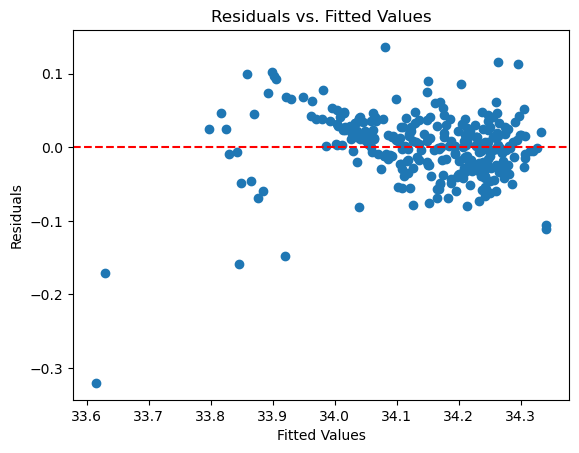

In [43]:
""" This code produces a Residuals vs. Fitted Values plot """

# Get the predicted values
y_pred = mlr.predict(x_test)

# Calculate residuals
residuals = y_test - y_pred

# Plotting
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()


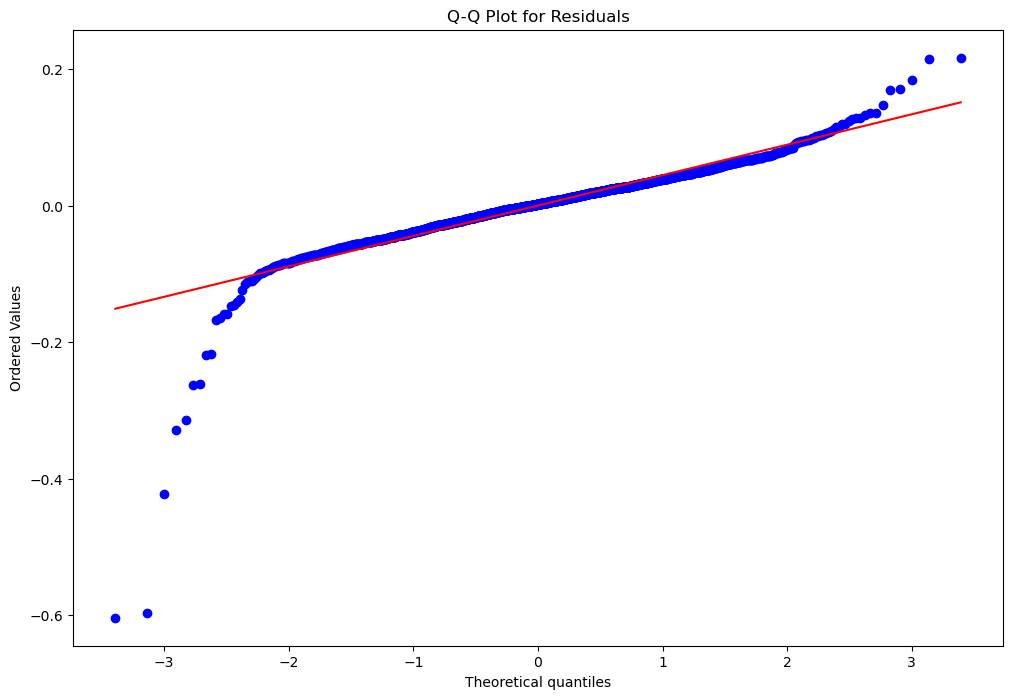

In [44]:
""" This code produces a Q-Q plot for Residuals """
residuals = model.resid

# Combine residuals for all predictor columns
std_resid = residuals 

# Q-Q plot
plt.figure(figsize=(12, 8))
probplot(std_resid, plot=plt)
plt.title('Q-Q Plot for Residuals')
plt.show()


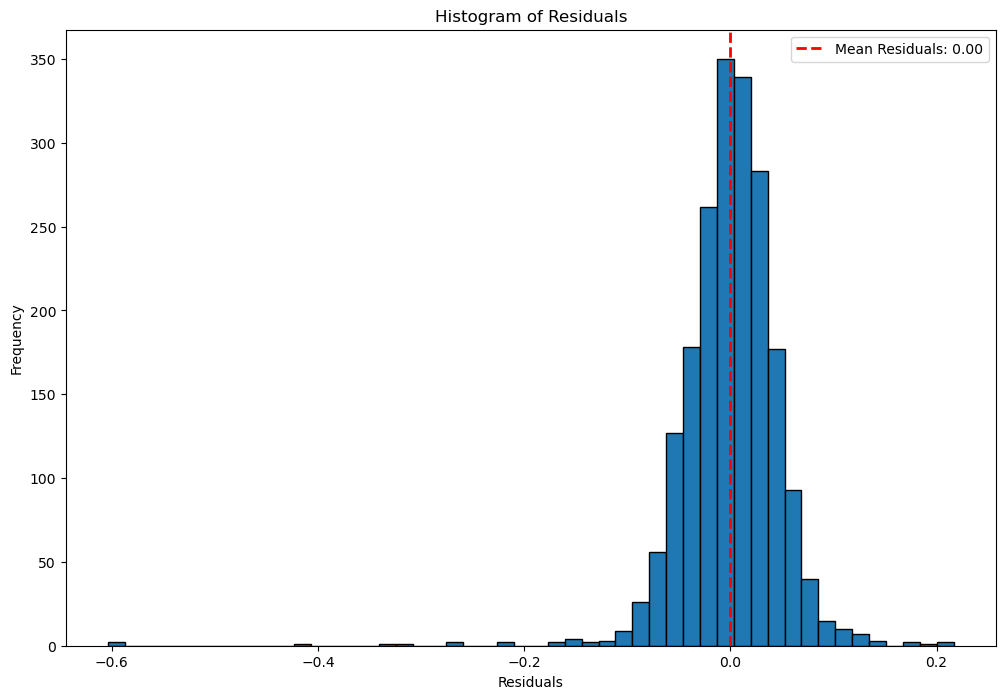

In [45]:
"Code creates a Histogram of residuals"

residuals = model.resid

plt.figure(figsize=(12, 8))
plt.hist(residuals, bins=50, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Calculate and plot the mean of residuals
mean_residuals = residuals.mean()
plt.axvline(x=mean_residuals, color='red', linestyle='dashed', linewidth=2, label=f'Mean Residuals: {mean_residuals:.2f}')

plt.legend()
plt.show()

In [46]:
""" Finding the Variance Inflation Factor values of the data"""
mlr = LinearRegression()  
mlr.fit(x_train, y_train)


x_train = sm.add_constant(x_train)

# Calculate VIF for each predictor variable
vif_data = pd.DataFrame()
vif_data["Variable"] = x_train.columns
vif_data["VIF"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]

# Display VIF values
print("VIF values:")
print(vif_data)

VIF values:
     Variable        VIF
0       const  31.579349
1      O2ml_L   1.163892
2    Bottom_D   1.195485
3   Year_2005   3.223190
4   Year_2006   3.944672
5   Year_2007   3.375424
6   Year_2008   1.020679
7   Year_2009   1.106096
8   Year_2010   2.085568
9   Year_2011   1.472228
10  Year_2012   1.038975
11    Month_2   2.364387
12    Month_3   1.191915
13    Month_4   2.231694
14    Month_6   1.137510
15    Month_7   2.683699
16    Month_8   1.124560
17    Month_9   1.740438
18   Month_10   1.759440
19   Month_11   2.400679
20    Wea_1.0   2.570914
21    Wea_2.0   2.679513
22    Wea_3.0   1.011254
23    Wea_4.0   1.344431
24    Wea_6.0   1.070790
